In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle("liquidationCall.pkl")

numeric_cols = [
    'borrowAssetPriceUSD', 
    'collateralAmount', 
    'collateralAssetPriceUSD', 
    'principalAmount'
]

df[numeric_cols].describe()

,borrowAssetPriceUSD,collateralAmount,collateralAssetPriceUSD,principalAmount
count,5539.000000,5.539000e+03,5539.000000,5.539000e+03
mean,107.370817,3.726571e+03,1133.465995,7.809852e+04
std,1526.060243,9.034114e+04,2935.575840,3.766054e+05
min,0.000000,1.260000e-06,0.000000,1.327149e-06
25%,0.999537,4.089973e-01,0.252610,5.597462e+02
50%,0.999928,3.002338e+00,1782.440000,3.898012e+03
75%,1.000110,3.738378e+01,1782.440000,2.395772e+04
max,63943.714539,6.071533e+06,63943.714539,9.769158e+06


In [3]:
df = pd.read_pickle("redeemUnderlying.pkl")

numeric_cols = [
    'amount',
    'assetPriceUSD'
]

df[numeric_cols].describe()

,amount,assetPriceUSD
count,1.988480e+05,198848.000000
mean,3.569499e+06,972.905291
std,1.975205e+07,4703.522252
min,1.000000e-18,0.000000
25%,3.998820e+00,0.999708
50%,1.928083e+02,1.000191
75%,2.067936e+04,1782.440000
max,2.654032e+08,64298.000000


In [4]:
df = pd.read_pickle("repay.pkl")

numeric_cols = [
    'amount',
    'assetPriceUSD'
]

df[numeric_cols].describe()

,amount,assetPriceUSD
count,1.314430e+05,131443.000000
mean,2.807270e+05,457.314501
std,2.603884e+06,3426.012950
min,1.000000e-18,0.000000
25%,8.723768e+01,0.999846
50%,4.928090e+03,1.000008
75%,6.006440e+04,1.000230
max,1.900568e+08,65684.281156


In [10]:
df = pd.read_pickle("liquidationCall.pkl")
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('datetime')

In [ ]:
df['collateral_value_usd'] = df['collateralAmount'] * df['collateralAssetPriceUSD']
df['debt_value_usd'] = df['principalAmount'] * df['borrowAssetPriceUSD']
df['liquidation_ratio'] = df['collateral_value_usd'] / df['debt_value_usd']

C:\Users\alban\AppData\Local\Temp\ipykernel_4712\3428361827.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['debt_value_usd'].resample('M').sum().plot(figsize=(10, 4), title='Monthly Total Liquidated Debt (USD)')


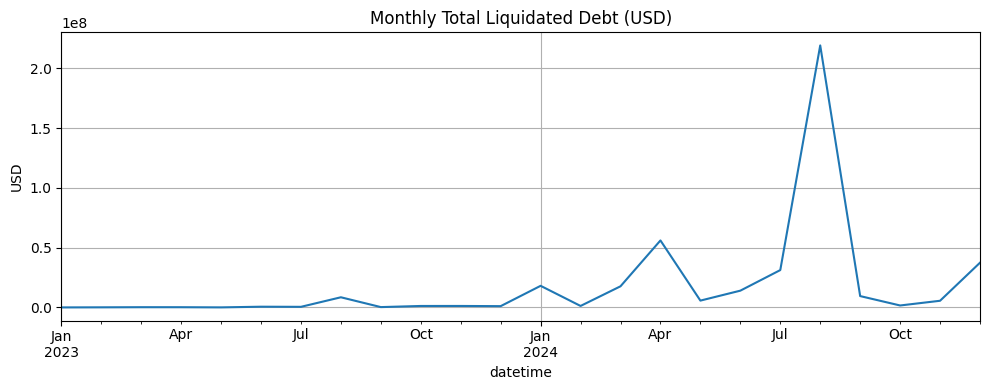

In [12]:
df['debt_value_usd'].resample('M').sum().plot(figsize=(10, 4), title='Monthly Total Liquidated Debt (USD)')
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()

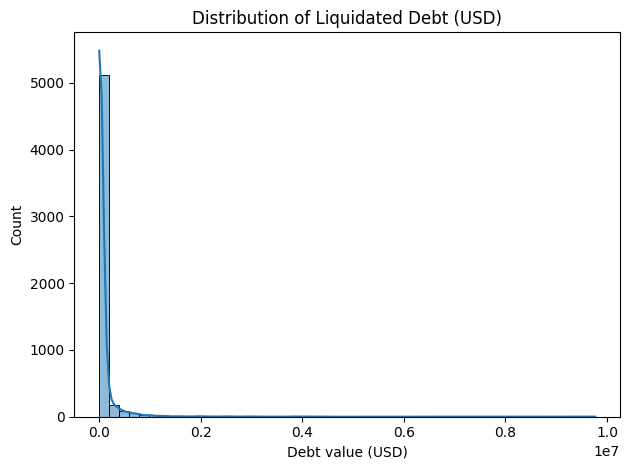

In [16]:
sns.histplot(df['debt_value_usd'], bins=50, kde=True)
plt.title("Distribution of Liquidated Debt (USD)")
plt.xlabel("Debt value (USD)")
plt.tight_layout()
plt.show()

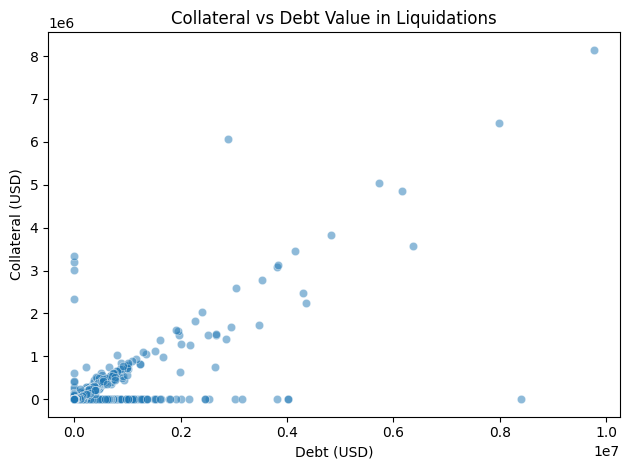

In [15]:
sns.scatterplot(x='debt_value_usd', y='collateral_value_usd', data=df, alpha=0.5)
plt.title("Collateral vs Debt Value in Liquidations")
plt.xlabel("Debt (USD)")
plt.ylabel("Collateral (USD)")
plt.tight_layout()
plt.show()

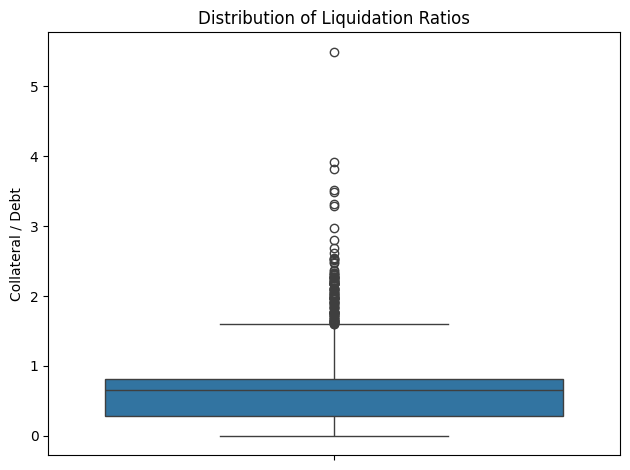

In [18]:
sns.boxplot(y='liquidation_ratio', data=df.reset_index())
plt.title("Distribution of Liquidation Ratios")
plt.ylabel("Collateral / Debt")
plt.tight_layout()
plt.show()